In [101]:
%matplotlib inline                  
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
from numpy import *
import time
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams.update({'font.size': 18})

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [102]:
start = 1
end = 24
folder = '.'
num = end - start +1

datageneral = np.loadtxt(r''+str(folder)+'/DataGeneral/DataGeneral'+str(start)+'.txt')
dt = datageneral[0]
pxtomum = datageneral[1]
offset = datageneral[2]
videosize = datageneral[3]
boundaryradius = datageneral[4]

dt = 0.05196
#videosize = 800        #800, 521, 256, 128
binning = 1
frametransfer = False
flashtime = 0.01
verticalshift = 1.9176e-6
dtprogram = 2e-3
dtcamtoPC = 1e-3
dtPCtoADwin = 1e-3

R = 2.19/2
T = 273.15+22
kB = 1.38064852e-23
eta=2.414e-5*10**(247.8/(T-140))
D_0 = kB*T/(6*np.pi*eta*R)

In [114]:
data2 = np.loadtxt(r''+str(folder)+'/DataImportant/DataImportant'+str(start)+'.txt')
importantlength = len(data2)

alldata = np.zeros((importantlength,num))
count = 0
for i in range(start,end+1):      
    data2 = np.loadtxt(r''+str(folder)+'/DataImportant/DataImportant'+str(i)+'.txt')
    alldata[:,count] = data2
    count += 1
    
data2 = np.loadtxt(r''+str(folder)+'/DataComparerInAndOut/DataComparerInAndOut'+str(start)+'.txt')
comparelength = len(data2[:,0])
comparerows = len(data2[0,:])

comparedata = np.zeros((comparelength,comparerows,num))
count = 0
for i in range(start,end+1):      
    data2 = np.loadtxt(r''+str(folder)+'/DataComparerInAndOut/DataComparerInAndOut'+str(i)+'.txt')
    comparedata[:,:,count] = data2
    count += 1
        
differenttaus = 1; differentdelays = 0
for i in range(num):
    for j in range(importantlength):
        if alldata[j,i] == 0:
            alldata[j,i] = np.nan
    if i > 0:
        if alldata[4,i] != alldata[4,i-1]: differenttaus += 1 
    if differenttaus == 1: differentdelays += 1
            
delaywave = np.zeros(num)
dtframetransfer = videosize/binning * verticalshift
dtreadout = (1032/27e6+verticalshift)*videosize/binning
for i in range(num): 
    dtexphalf = flashtime/2
    dttotal = dtexphalf + dtframetransfer + dtreadout + dtcamtoPC + dtprogram + dtPCtoADwin
    delaywave[i] = dttotal + (alldata[5,i]-1)*dt

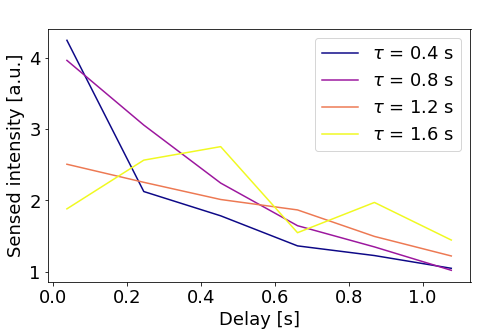

In [115]:
colorwave = cm.plasma(np.linspace(0, 1, 4))
fig = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_xlabel('Delay [s]')#
for i in range(differenttaus):
    ax1.plot(delaywave[differentdelays*i:differentdelays*i+differentdelays],alldata[-2,differentdelays*i:differentdelays*i+differentdelays], color=colorwave[i],label = r'$\tau$ = '+str(round(0.4+0.4*i,1))+' s')
ax1.set_ylabel('Sensed intensity [a.u.]')
ax1.set_title(' ')
plt.legend()
plt.tight_layout()
plt.savefig('Intensity vs Delay.pdf', format='pdf')
plt.show()

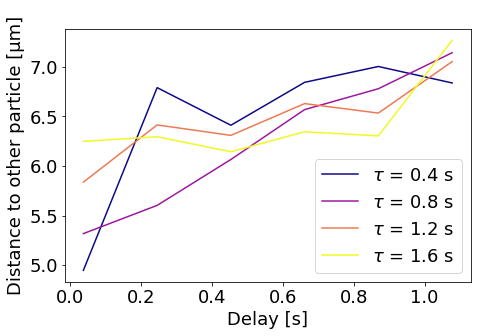

In [116]:
colorwave = cm.plasma(np.linspace(0, 1, 4))
fig = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_xlabel('Delay [s]')#
for i in range(4):
    ax1.plot(delaywave[differentdelays*i:differentdelays*i+differentdelays],alldata[0,differentdelays*i:differentdelays*i+differentdelays], color=colorwave[i],label = r'$\tau$ = '+str(round(0.4+0.4*i,1))+' s')
ax1.set_ylabel('Distance to other particle [µm]')
ax1.set_title(' ')
plt.legend()
plt.tight_layout()
plt.savefig('Distance to other particle vs Delay.pdf', format='pdf')
plt.show()

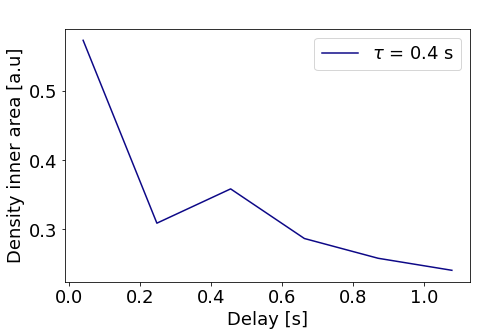

In [117]:
colorwave = cm.plasma(np.linspace(0, 1, 4))
fig = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_xlabel('Delay [s]')#
for i in range(1):
    ax1.plot(delaywave[differentdelays*i:differentdelays*i+differentdelays],alldata[-1,differentdelays*i:differentdelays*i+differentdelays], color=colorwave[i],label = r'$\tau$ = '+str(round(0.4+0.4*i,1))+' s')
ax1.set_ylabel('Density inner area [a.u]')
ax1.set_title(' ')
plt.legend()
plt.tight_layout()
plt.savefig('Density inner area vs Delay first.pdf', format='pdf')
plt.show()

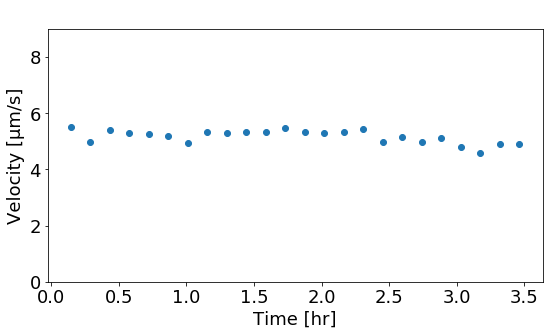

In [118]:
colorwave = cm.plasma(np.linspace(0, 1, 3))
numwave = np.linspace(1,num,num)
numwave[:] *= 10000*dt/60/60

fig = plt.subplots(figsize=(8,5))
ax1 = plt.subplot(111)
ax1.scatter(numwave,alldata[19,:])
ax1.set_xlabel('Time [hr]')#
ax1.set_ylabel('Velocity [µm/s]')
ax1.tick_params('y')
ax1.set_title(' ')
ax1.set_ylim([0,9])

plt.tight_layout()
plt.savefig('Velocity over time.pdf', format='pdf')
plt.show()

In [119]:
data2 = np.loadtxt(r''+str(folder)+'/DataIntensity/DataIntensity'+str(start)+'.txt')
length2 = len(data2)
rows = len(data2[0,:])

alldata2 = np.zeros((length2,rows,num))
count = 0
for i in range(start,end+1):      
    data2 = np.loadtxt(r''+str(folder)+'/DataIntensity/DataIntensity'+str(i)+'.txt')
    alldata2[:,:,count] = data2
    count += 1

In [120]:
#R = 2.19/2
points = 1000
distpx = np.linspace(0,boundaryradius,points)
distmum = distpx * pxtomum
sigmat = 80
intensity = np.zeros(points)
intensity = 2*np.exp(-distpx**2/sigmat**2)/2

distint = np.linspace(0,1,points)
velocity = np.zeros(points)
for i in range(points):
    value = -5/4*distint[i]+9/8
    if value < 0: value = 0
    if value > 1: value = 1
    velocity[i] = value
    
velocitydist = np.zeros(points)
for i in range(points):
    check = True; count = 0
    while check == True:
        if distint[count] >= intensity[i]:
            velocitydist[i] = velocity[count]
            check = False
        else: count += 1

In [121]:
maxvelo = mean(alldata[int(length2/2),-1,:])
fig, ax = plt.subplots(figsize=(7,4))        
colorwave = cm.plasma(np.linspace(0, 1, differentdelays))
ax2 = plt.subplot(1,1,1)
count = 0
for i in range(0,differentdelays):
    im = ax2.plot(alldata2[:,0,i],alldata2[:,-1,i],color=colorwave[count], label = 'Delay '+str(round(delaywave[count],2)))
    count += 1
ax2.set_xlabel('Distance to the particle [µm]')
ax2.set_ylabel('v [µm/s]')
ax2.axvline(x=2*R,linewidth=0.5, color = 'k',linestyle='--',label = 'mean value')
ax2.set_xlim([0,boundaryradius*pxtomum])
#ax2.set_xlim([0,8])
#ax2.set_title('b)',loc='left')
plt.plot(distmum,velocitydist*maxvelo, color = 'k',linestyle='--')

data = np.linspace(delaywave[0], delaywave[-1], num).reshape(num, 1)
im = ax.imshow(data, cmap='plasma')
divider = make_axes_locatable(ax2)
cax = fig.add_axes([0.8, 0.25, 0.04, 0.4])
plt.colorbar(im, cax=cax)
plt.text(0.8,1.05,r'$\delta$ [s]')

plt.tight_layout()
plt.savefig('Velocity profile depending on delay.pdf', format='pdf')
plt.show()

IndexError: too many indices for array

/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


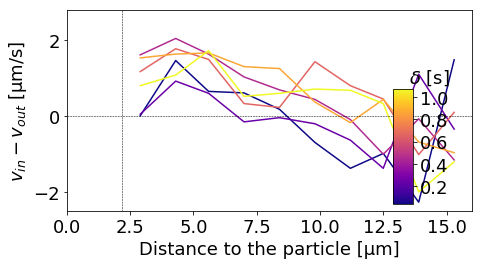

In [122]:
meanveloin = np.zeros((length2,num))
meanveloout = np.zeros((length2,num))
difference = np.zeros((length2,num))
for i in range(num):
    meanveloin[:,i] = comparedata[:,1,i]#alldata[:,2,i]
    meanveloout[:,i] = comparedata[:,2,i]#alldata[:,3,i]
    difference[:,i] = meanveloin[:,i]-meanveloout[:,i]
    
fig, ax = plt.subplots(figsize=(7,4))        
colorwave = cm.plasma(np.linspace(0, 1, differentdelays))
ax2 = plt.subplot(1,1,1)
count = 0
for i in range(differentdelays):
    im = ax2.plot(alldata2[:,0,i],difference[:,i],color=colorwave[count], label = 'Delay '+str(round(delaywave[count],2)))
    count += 1
ax2.set_xlabel('Distance to the particle [µm]')
ax2.set_ylabel(r'$v_{in} - v_{out}$ [µm/s]')
ax2.set_xlim([0,boundaryradius*pxtomum])
ax2.axvline(x=2*R,linewidth=0.5, color = 'k',linestyle='--',label = 'mean value')
ax2.axhline(y=0,linewidth=0.5, color = 'k',linestyle='--')
factor = 1.1
ax2.set_ylim([factor*np.amin(difference[2:9,:]),factor*np.amax(difference[2:9,:])])
#ax2.set_title('b)',loc='left')

data = np.linspace(delaywave[0], delaywave[-1], num).reshape(num, 1)
im = ax.imshow(data, cmap='plasma')
divider = make_axes_locatable(ax2)
cax = fig.add_axes([0.8, 0.25, 0.04, 0.4])
plt.colorbar(im, cax=cax)
plt.text(0.8,1.05,r'$\delta$ [s]')

plt.tight_layout()
plt.savefig('Vin - Vout tau 1.6.pdf', format='pdf')
plt.show()

/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


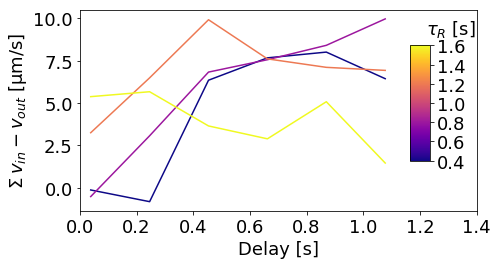

In [123]:
drift = np.zeros((6,4))
count = 0
for j in range(4):
    count2 = 0
    for i in range(4*j,4*j+6):
        drift[count2,j] = sum(meanveloin[:-2,count]-meanveloout[:-2,count])
        count += 1
        count2 += 1

fig, ax = plt.subplots(figsize=(7,4))        
colorwave = cm.plasma(np.linspace(0, 1, 4))
ax2 = plt.subplot(1,1,1)
count = 0
for i in range(4):
    im = ax2.plot(delaywave[6*i:6*i+6],drift[:,i],color=colorwave[i])
    count += 1
ax2.set_xlabel('Delay [s]')
ax2.set_ylabel(r'$\Sigma \: v_{in} - v_{out}$ [µm/s]')
#ax2.set_ylim([0,2.1])
ax2.set_xlim([0,1.4])
#ax2.set_title('b)',loc='left')

data = np.linspace(0.4, 1.6, num).reshape(num, 1)
im = ax.imshow(data, cmap='plasma')
divider = make_axes_locatable(ax2)
cax = fig.add_axes([0.8, 0.4, 0.04, 0.4])
plt.colorbar(im, cax=cax)
plt.text(0.8,1.1,r'$\tau_{R}$ [s]')

plt.tight_layout()
plt.savefig('Drift.pdf', format='pdf')
plt.show()

/Users/alex/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


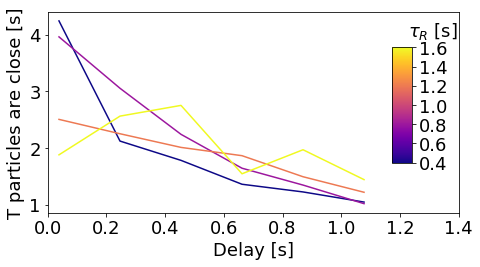

average =  2.023  s


In [124]:
fig, ax = plt.subplots(figsize=(7,4))        
colorwave = cm.plasma(np.linspace(0, 1, differenttaus))
ax2 = plt.subplot(1,1,1)
count = 0
for i in range(differenttaus):
    im = ax2.plot(delaywave[differentdelays*i:differentdelays*i+differentdelays],alldata[-2,differentdelays*i:differentdelays*i+differentdelays],color=colorwave[i])
    count += 1
ax2.set_xlabel('Delay [s]')
ax2.set_ylabel(r'T particles are close [s]')
ax2.set_xlim([0,1.4])

data = np.linspace(0.4, 1.6, num).reshape(num, 1)
im = ax.imshow(data, cmap='plasma')
divider = make_axes_locatable(ax2)
cax = fig.add_axes([0.8, 0.4, 0.04, 0.4])
plt.colorbar(im, cax=cax)
plt.text(0.8,1.1,r'$\tau_{R}$ [s]')

plt.tight_layout()
plt.savefig('Particles are close.pdf', format='pdf')
plt.show()

print('average = ',round(np.mean(alldata[-2,:]),3),' s')